In [1]:
import acquire
import prepare
import explore

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
import scipy.stats as stats

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

import matplotlib as mpl

plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')

# Github Repository Language Prediction: a Machine Learning Approach Using Natural Language Processing

## Project Goal

The goal of this project was to predict the programming language used in Github repositories based on the contents of the README file. The ability to classify repositories based on the README is useful for search engine optimization and potentially for data storage strategies. Features from the README texts were built leveraging natural language processing techniques such as bag of words and tf-idf scores. These features were inputted to numerous machine learning classification models to predict the programming language based on the README text.

## Data Acquisition

Data was acquired from 150 data science repositories from three different programming languages: Python, C++, and Java. The list of repositories acquired was based on performing a search for "machine learning" and specifying the programming language. Acquisition is accomplished using the acquire.py module and results in a dataset with 50 repositories for each language. The acquired data is also saved to a data.json cache to allow for faster subsequent loads.

In [2]:
df = acquire.get_repo_data()

Data consists of the repo name, language, and raw readme_contents.

In [3]:
df.head(2)

,repo,language,readme_contents
0,janishar/mit-deep-learning-book-pdf,Java,[![Download](https://img.shields.io/badge/down...
1,Angel-ML/angel,Java,![](assets/angel_logo.png)\n\n[![license](http...


## Data Preparation

The data was prepared by performing the following:
- Cleaning: converting text to lowercase, normalizing the text to remove inconsistencies in unicode character encoding, and encoding strings to ASCII. Also, any text not a through z, a number, a single quote, or whitespace was removed.
- Stemming: using the Porter method the stems of each word were extracted
- Lemmatizing: using the WordNetLemmatizer in nltk the root word was extracted
- Stopword removal: removing words with little or no significance to focus the exploration and modeling on words with lower frequency. Based on exploration extra words were added to the stopword removal process as these words did not add significant value to differentiating the repository's language.
- New features were made with the word counts and overall readme length, for the original, stemmed, and lemmatized versions.

In [4]:
extra_words = ['see', 'source', 'example', 'code', 'use', '1', "'", ';', '&#9']
prepared_data = prepare.prepare_df(df, column =  'readme_contents', extra_words = extra_words)

In [5]:
prepared_data.head(2)

,repo,language,readme_contents,clean,stemmed,lemmatized,original_length,stem_length,lem_length,original_word_count,stemmed_word_count,lemmatized_word_count
0,janishar/mit-deep-learning-book-pdf,Java,[![Download](https://img.shields.io/badge/down...,downloadhttpsimgshieldsiobadgedownloadbookmark...,downloadhttpsimgshieldsiobadgedownloadbookmark...,downloadhttpsimgshieldsiobadgedownloadbookmark...,2995,1971,2112,369,212,214
1,Angel-ML/angel,Java,![](assets/angel_logo.png)\n\n[![license](http...,assetsangellogopng licensehttpimgshieldsiobadg...,assetsangellogopng licensehttpimgshieldsiobadg...,assetsangellogopng licensehttpimgshieldsiobadg...,7394,5235,5508,511,349,350


The data was split into train, validate, and test sets for further exploration and modeling.

In [6]:
train, validate, test = prepare.train_validate_test_split(prepared_data, target = 'language')

## Exploration

### Question: What are the most common words in the READMEs?
We can create a new dataframe to represent the word counts of our READMEs by using segmenting our data by category and then taking the frequency of the individual words. For the sake of our exploration this was done using our lemmatized words. The frequencies are then combined into a single dataframe, word_counts, where we can analyze the outcomes.

In [7]:
# Calling the word_counts() function from the explore module with our train df
word_counts = explore.word_counts(train)

In [8]:
# An example of seeing what words are the most frequent overall, changing the column for by='{column}' we could
# specify which language we want to check the top frequency of words for. 
word_counts.sort_values(by='all', ascending=False).head()

,all,java,python,c++
install,1123,21,1007,95
codea,894,0,894,0
detail,712,7,678,27
pip,705,11,661,33
open,704,17,664,23


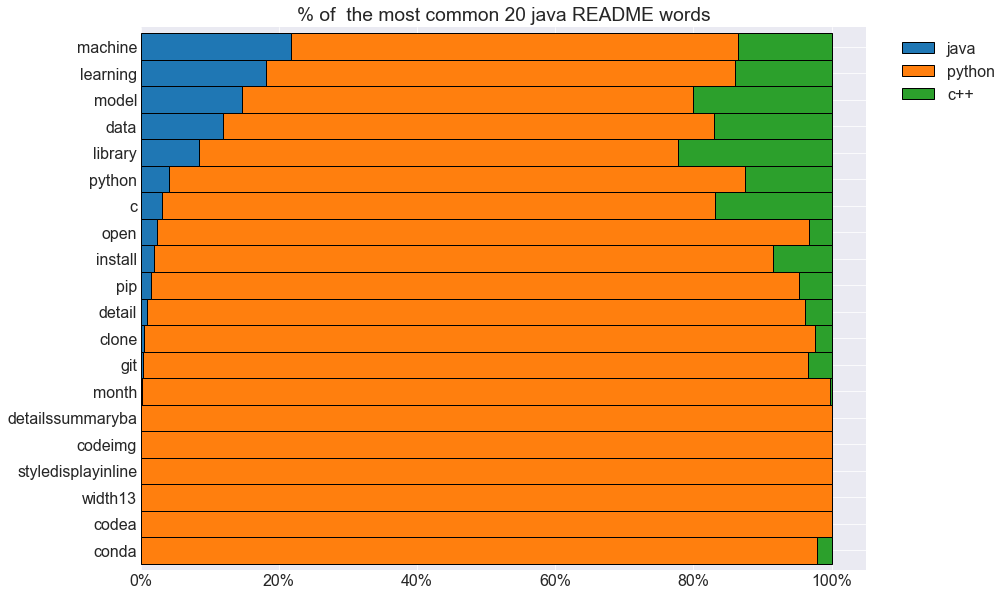

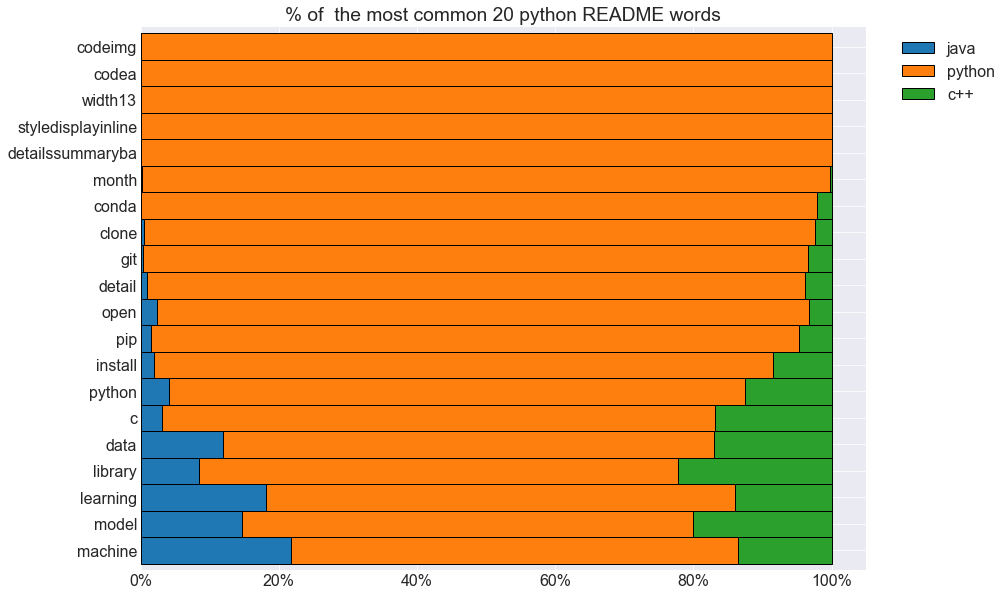

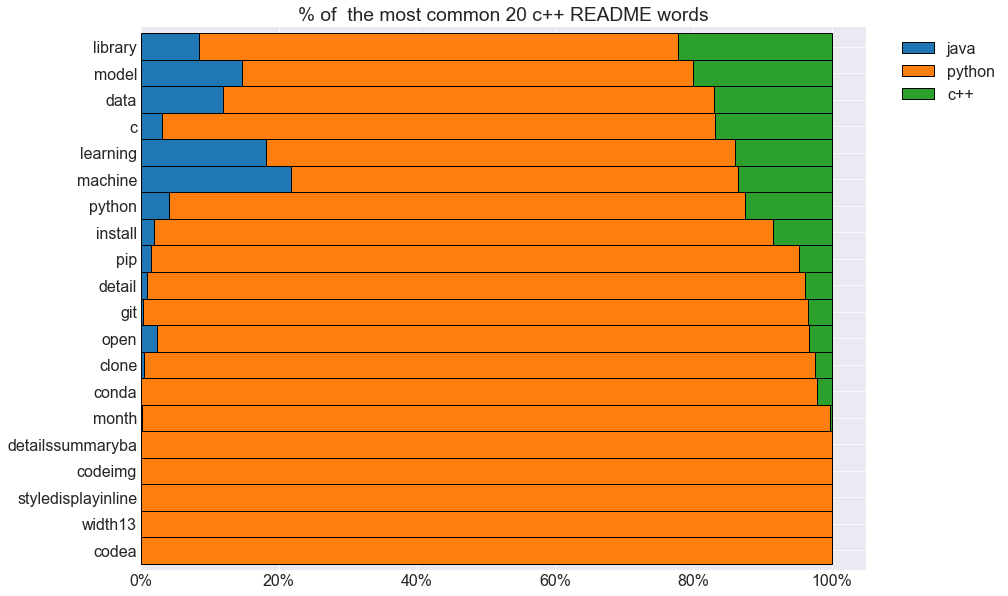

In [10]:
#most common words sorted by each language
explore.common_words(word_counts)